In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime

%matplotlib inline

# **Логистическая регрессия**

In [1]:
pip install -U dataprep


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from dataprep.eda import *

In [33]:
df_bike = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Модуль 3/Файлы для итоговой/LogistReg.csv')

In [6]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56401 entries, 0 to 56400
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PredictionEvent        56401 non-null  bool   
 1   PredictionProbability  56401 non-null  float64
 2   ActualEvent            56401 non-null  bool   
 3   Churn_predicted        56401 non-null  object 
 4   Churn                  56401 non-null  object 
 5   ShipDate               56401 non-null  object 
 6   ProductName            56401 non-null  object 
 7   Category               56401 non-null  object 
 8   CustomerState          56401 non-null  object 
 9   ABC_XYZ                56401 non-null  object 
 10  Cluster                56401 non-null  int64  
 11  OrderDate_2            56401 non-null  object 
 12  CustomerCountry        56401 non-null  object 
 13  OrderDate              56401 non-null  object 
 14  OrderDate_YM_1         56401 non-null  object 
 15  Or

In [34]:
duplicated_rows=df_bike[df_bike.duplicated()]
print('Число дублированных строк:',duplicated_rows.shape )


Число дублированных строк: (7, 41)


In [35]:
df_bike = df_bike.drop_duplicates()


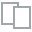
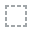
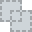
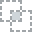
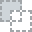
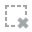
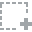
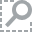
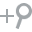
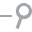
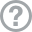
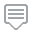
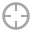
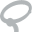
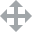
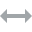
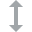
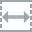
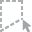
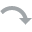
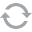
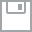
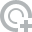
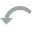
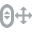
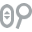
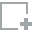
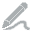
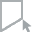
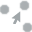
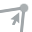
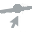

In [10]:
plot(df_bike)

Используем для исследовательского анализа данных библиотеку Dataprep модуль EDA. Цель этого блока - понять признаки, их взаимосвязь между собой, взаимосвязь между предпологаемого атрибута с целью(выходным признаком)

 В разделе 'Show Stats and Insights' можно увидеть все основные характеристики по данным: 
- Пропущенных и дублирующих значений нет;
- 68 столбцов;
- 58189 строк;

- Много значений с перекосом **(skrewed)** в лево(право), т.е. распределение неравномерное. 
- Много высококоординальных значений**(High Cardinality)**(т.е. много уникальных значений), что не очень хорошо, значения с шумом. Также есть данные с большим числом значений-констант**(Constant Length)**

Проанализируем наши данные по некоторым важным показателям: 

1. Процент ушедших клиентов (Churn –“Yes”) составляет 11 %. 
2. По первым диаграммам ShipDate понятно, что в 2016 бизнес пошел в рост, количество и частота заказов значительно увеличились.
3.  Поле ProductName показывает, что больше всего покупают товары Water Bottle (Вода в бутылке), PatchKit (Заплаточный набор), Mountain Tire Tube(Горные шины).
4. Поле Category показывает, что больше всего люди покупают недорогие аксессуары, велосипеды и в последнюю очередь одежду.
5. Покупатели из Калифорнии больше всего из покупателей – 20,36%
6.Самое большое число товаров в ассортименте в категории CХ – в нашем случае это товары, дающие минимальные объемы продаж, но при этом с регулярными отгрузками (категория – Аксессуары) 
7. Кластерный анализ (Cluster) показал, что «нулевой кластер» занимает 32%
8. CustomerCountry показывает, что большинство клиентов находятся в США.
9. По OrderQuantity видно, что чаще берут по одному товару -71,47%.
10. 41% всех покупок совсем небольшой ценовой категории (UnitPrice) -0,57 $.
11. 44% всех сумм покупок (SalesAmount)в пределах 21 долл.
12. Чаще всего покупают шины и колеса 28% и дорожные велосипеды 13,8% от всего ассортимента (SubCategory)
13. Черный цвет товара преобладает у покупателей – 63,7%.(Color)
14. Преимущественно покупают товары в категории Sport, Mountain (ProductLine)
15. И пользуются популярностью модели Sport-100 и Water-Bottle(ModelName)
16. Большинство покупателей это женатые (M - Married) и 60-х, 70-х годов рождения (наибольшее -1968 гр) (BirthDate, MaritalStatus).
17. По половому признаку покупатели разделились 50/50(Gender).
18.Чаще всего делают покупки клиенты с годовым доходом от 58 до 61 тыс.долл. и от 38 до 42 тыс.долл. (YearlyIncome)
19.28% клиентов не имеют детей, детей, 20% имеют 2 детей, а 7,5% остальных имеют 5 детей – это информация о детях любого возраста (TotalChildren). Что касается несовершеннолетних детей, то 59% их не имеет. (NumberChildrenAtHome)
20. По уровню образования 30,25% клиентов имеют степень бакалавра, 27% не закончили колледж, 17% магистры, среднее образование также у 17%, остальные 8% не закончили школу(Education).
 По степени занятости, преобладают люди, имеющие высокие профессиональные навыки 31,5% (Occupation)
21. 69% клиентов владеют недвижимостью 33,6% имеют в семье 2 машины (HouseOwnerFlag, NumberCarsOwned)
22. 35,5% клиентов работают недалеко от дома – 0-1 мили (CommuteDistance)
23. Покупатели из Лондона составляют самый большой процент – 2,64% (1535 покупателей)(CustomerCity)
24. Наибольшая доля рынка у Северной Америки - 47.5% (Group)
25. Большинство клиентов пришли в магазин в 2016 году (по полю RFM) разделили их 211(48%) 27994 клиентов (- 211 — спящие частые покупатели с высоким чеком) и 111 (44%) 25321 клиентов( — недавние частые полкупателис высоким чеком).


До этого нужно проверить наши данные на корректность для подачи в Машинное обучение. 

Из датасета можно удалить явно ненужные признаки, которые не будут влиять на прогноз оттока клиентов. 

In [31]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56401 entries, 0 to 56400
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PredictionProbability  56401 non-null  float64
 1   Churn                  56401 non-null  object 
 2   ProductName            56401 non-null  object 
 3   Category               56401 non-null  object 
 4   CustomerState          56401 non-null  object 
 5   ABC_XYZ                56401 non-null  object 
 6   Cluster                56401 non-null  int64  
 7   CustomerCountry        56401 non-null  object 
 8   OrderQuantity          56401 non-null  int64  
 9   UnitPrice              56401 non-null  float64
 10  TotalProductCost       56401 non-null  float64
 11  SalesAmount            56401 non-null  float64
 12  TaxAmt                 56401 non-null  float64
 13  StandardCost           56401 non-null  float64
 14  Color                  56401 non-null  object 
 15  Li

In [37]:
df_bike.drop(['Churn_predicted','PredictionEvent', 'ActualEvent','OrderDate_2','StartDate', 
              'BirthDate', 'OrderDate', 'ShipDate','OrderDate_YM_1', 'OrderDate_YD_1',
              'OrderDate_Y_1','RFM'], axis=1, inplace=True)



KeyError: ignored

### Далее определим какие категориальные признаки, чтобы перевести их в числовой признак.

По колонке **CommuteDistance**(среднее срасстояние до дома) можно вывести среднее расстояние. 

In [38]:
df_bike['CommuteDistance'].value_counts()

0-1 Miles     19939
5-10 Miles     9877
1-2 Miles      9467
2-5 Miles      9425
10+ Miles      7686
Name: CommuteDistance, dtype: int64

In [39]:
df_bike['CommuteDistance'] = df_bike['CommuteDistance'].str.replace('Miles', '').str.replace('-','').str.replace('+','')
df_bike['CommuteDistance'].value_counts()

01      19939
510      9877
12       9467
25       9425
10       7686
Name: CommuteDistance, dtype: int64

Переведем категориальные признаки в числовые с помщью библиотеки OrdinalEncoder

In [40]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()

In [43]:
df_bike[['Churn', 'ProductName', 'Category', 'CustomerState', 'ABC_XYZ',
       'CustomerCountry', 'Color', 'ModelName',
       'MaritalStatus', 'Gender', 'Education', 'Occupation', 'CommuteDistance',
       'CustomerCity', 'Region']] = ord_enc.fit_transform(df_bike[['Churn', 'ProductName', 'Category', 'CustomerState', 'ABC_XYZ',
       'CustomerCountry', 'Color', 'ModelName',
       'MaritalStatus', 'Gender', 'Education', 'Occupation', 'CommuteDistance',
       'CustomerCity', 'Region', ]])

       

In [45]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56394 entries, 0 to 56400
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PredictionProbability  56394 non-null  float64
 1   Churn                  56394 non-null  float64
 2   ProductName            56394 non-null  float64
 3   Category               56394 non-null  float64
 4   CustomerState          56394 non-null  float64
 5   ABC_XYZ                56394 non-null  float64
 6   Cluster                56394 non-null  int64  
 7   CustomerCountry        56394 non-null  float64
 8   OrderQuantity          56394 non-null  int64  
 9   UnitPrice              56394 non-null  float64
 10  TotalProductCost       56394 non-null  float64
 11  SalesAmount            56394 non-null  float64
 12  TaxAmt                 56394 non-null  float64
 13  StandardCost           56394 non-null  float64
 14  Color                  56394 non-null  float64
 15  Li


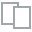
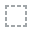
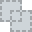
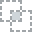
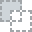
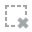
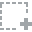
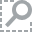
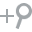
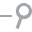
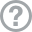
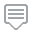
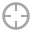
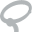
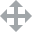
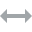
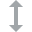
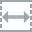
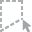
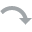
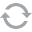
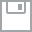
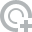
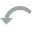
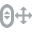
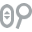
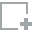
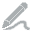
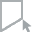
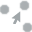
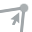
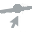

In [46]:
plot_correlation(df_bike)

Наибольшая корреляция - 0.99 и наименьшая - -0.67(-0.79). Нежелательно подавать на вход для машинного обучения признаки с высокой коррлеяцией.

# Определим выходной признак

Т.к. мы решаем задачу логистической регрессии по прогнозу оттока клиентов, можно определить выходной признак - **Churn**

Посмотрим на матрицу корреляцию для определения зависимых признаков

In [18]:
corr = df_bike.corr()
px.imshow(corr, text_auto=True, aspect='auto')

По матрице видно, что можно удалить некоторые высококорреллированные признаки - CustomerCountry, ModelName, TotalProductCost

In [19]:
df_bike.drop(['CustomerCountry', 'ModelName', 'TotalProductCost', 'ListPrice', 
              'CustomerCountry'], axis=1, inplace=True)

### Моделирование

Далее импортируем необходимые библиотеки и определим обучающие и тестовые выборки. И проведем обучение модели на Градиентном бустинге и PyCaret

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error

Разделим данные на обучающую и тестовую выборку.

In [47]:
x = df_bike.drop(['Churn'], axis =1)
y = df_bike['Churn']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(39475, 28) (16919, 28) (39475,) (16919,)


Преобразуем данные в один числовой диапозон с помощью **MinMaxScaler**

In [49]:
min_macsaler = preprocessing.MinMaxScaler()
scaled_minmax = min_macsaler.fit_transform(x_train)
scaled_minmax_df = pd.DataFrame(scaled_minmax, columns = x.columns)
scaled_minmax_df

,PredictionProbability,ProductName,Category,CustomerState,ABC_XYZ,Cluster,CustomerCountry,OrderQuantity,UnitPrice,TotalProductCost,...,Gender,YearlyIncome,TotalChildren,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,CustomerCity,Region
0,0.141407,0.534884,0.5,0.156863,1.000,0.50,0.8,0.333333,0.023122,0.029417,...,0.0,0.1250,0.6,0.0,0.00,1.0,0.00,0.00,0.369811,1.000000
1,0.009022,0.496124,0.5,0.509804,1.000,0.50,0.0,0.333333,0.025899,0.034639,...,1.0,0.3750,0.0,0.0,0.75,1.0,0.25,1.00,0.584906,0.000000
2,0.150469,0.775194,0.0,0.549020,0.750,0.75,0.4,0.000000,0.000730,0.998908,...,0.0,0.0625,0.0,1.0,0.50,1.0,0.50,0.50,0.347170,0.333333
3,0.062641,0.131783,1.0,0.058824,0.375,0.00,0.6,0.000000,0.001048,0.000839,...,1.0,0.0625,0.0,1.0,0.50,0.0,0.50,0.00,0.460377,0.444444
4,0.115280,0.426357,0.0,0.568627,0.000,0.75,0.6,0.000000,0.771429,0.294419,...,1.0,0.1250,0.0,0.5,0.50,0.0,0.25,0.50,0.694340,0.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39470,0.074423,0.976744,0.0,0.803922,0.000,0.00,0.0,0.000000,0.768841,0.708281,...,1.0,0.4375,0.0,0.0,0.75,1.0,0.50,0.25,0.713208,0.000000
39471,0.053973,0.767442,0.0,0.568627,0.000,0.00,0.6,0.000000,0.000730,0.998908,...,1.0,0.6875,0.4,1.0,0.75,1.0,1.00,1.00,0.433962,0.444444
39472,0.068451,0.775194,0.0,0.705882,0.750,0.50,0.6,0.000000,0.000730,0.998908,...,0.0,0.1250,0.0,0.5,0.50,0.0,0.25,0.75,0.471698,0.444444
39473,0.069038,0.317829,0.5,0.941176,1.000,0.50,0.0,0.333333,0.008148,0.009337,...,0.0,0.0000,0.2,0.5,0.50,0.0,0.00,0.75,0.400000,0.000000


Рекурсивное удаление неважныех признаков с помощью перекрестной проверки, посмотрим на них, и проведем обучение на этих признаках.

In [50]:
rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=10)
rfecv.fit(scaled_minmax_df, y_train)

RFECV(cv=10, estimator=RandomForestClassifier(random_state=101))

In [52]:
print('Оптимальное количество признаков:%d'%rfecv.n_features_)

Оптимальное количество признаков:18


Рекурсивное удаление признаков с кросс-валидацией выявило 18 основных признаков, которые влияют на целевой признак. Далее будем использовать эти признаки для обучения наших моделей.

In [53]:
x_train_new = x_train.values[:, rfecv.support_]
x_test_new = x_test.values[:, rfecv.support_]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning:

The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.



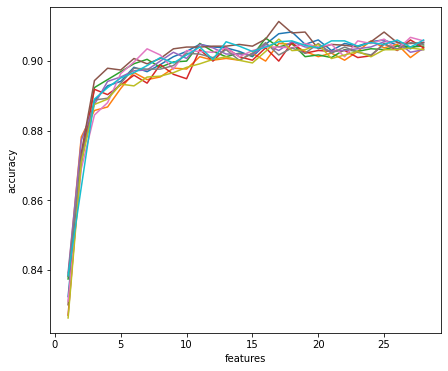

In [54]:
plt.figure(figsize=(6*1.168,6))
plt.xlabel('features')
plt.ylabel('accuracy')
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)

In [60]:
selected_features = list(np.array(x.columns)[rfecv.support_])
print(selected_features, '\n')

['PredictionProbability', 'ProductName', 'CustomerState', 'ABC_XYZ', 'Cluster', 'UnitPrice', 'TotalProductCost', 'StandardCost', 'ListPrice', 'ModelName', 'YearlyIncome', 'TotalChildren', 'Education', 'Occupation', 'NumberCarsOwned', 'CommuteDistance', 'CustomerCity', 'Region'] 



In [56]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import lightgbm as lgb

Проведем обучение модели. На вход подаем оставшиеся 18 признаков, которые были определены как важные для прогнозирования оттока клиентов.

In [61]:
model = lgb.LGBMClassifier()
model.fit(x_train_new, y_train)

LGBMClassifier()

Проведем прогноз на новых ранее не виданных данных - x_test_new

In [69]:
y_pred= model.predict(x_test_new)

array([0., 0., 0., ..., 0., 0., 0.])

Построим график 

LGBMClassifier: ROC AUC=0.851


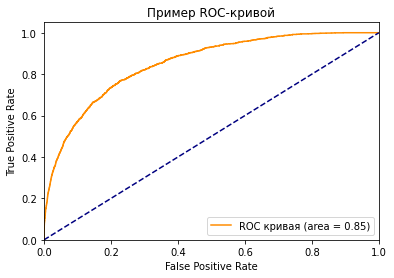

In [63]:
# получаем прогноз модели
lr_probs = model.predict_proba(x_test_new)

# сохраняем вероятности только для положительного исхода
lr_probs = lr_probs[:, 1]

# рассчитываем ROC AUC
lr_auc = roc_auc_score(y_test, lr_probs)
print('LGBMClassifier: ROC AUC=%.3f' % (lr_auc))

# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)

# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

По метрике качества ROC AUC видно, что нам намного  удалось улучшить до 0.85, чем модель в Loginom, которая выдала результат 0.77 . Данную модель можно рекомендовать для использования. 

### Посмотрим на матрицу ошибок

In [64]:
cm = confusion_matrix(y_test, y_pred)
print('Матрица ошибок\n\n', cm)
print('\nИстинно положительные(TP) = ', cm[0,0])
print('\nИстинно отрицателльные(TN) = ', cm[1,1])
print('\nЛожно положительные(FP) = ', cm[0,1])
print('\nЛожно отрицательные(FN) = ', cm[1,0])

Матрица ошибок

 [[14964   162]
 [ 1412   381]]

Истинно положительные(TP) =  14964

Истинно отрицателльные(TN) =  381

Ложно положительные(FP) =  162

Ложно отрицательные(FN) =  1412


In [65]:
import seaborn as sns

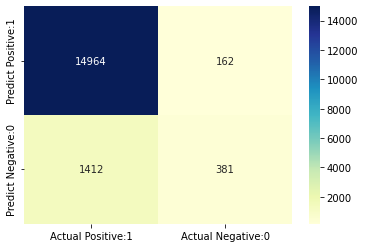

In [66]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

- Верхний левый элемент (True Positive): сколько раз модель правильно классифицировала Positive как Positive?
- Верхний правый (False Negative): сколько раз модель неправильно классифицировала Positive как Negative?
- Нижний левый (False Positive): сколько раз модель неправильно классифицировала Negative как Positive?
- Нижний правый (True Negative): сколько раз модель правильно классифицировала Negative как Negative?

### Попробуем интепретирвать матрицу ошибок, узнаем сколько правильных и неправильных прогнозов у нашей модели.  

- *Истинно положительные(TP) решение*: Таким образом, наша модель спрогозировала, что остануться в компании 15410 клиента, и они остаются.

- *Истинно отрицателльные(TN)* =  Модель правильно спрогнозировала, что 605 клиентов уйдут из компании, что соответсвует действительности.

- *Ложно положительные(FP)* =  Модель предсказала, что 174 клиентов остануться, а на самом деле они ушли.(Ошибка первого рода)

- *Ложно отрицательные(FN)* =  Модель предсказала, что 1268 уйдут, а на самом деле они остались в компании (Ошибка второго рода)

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.feature_selection import GenericUnivariateSelect, mutual_info_classif, SelectFromModel

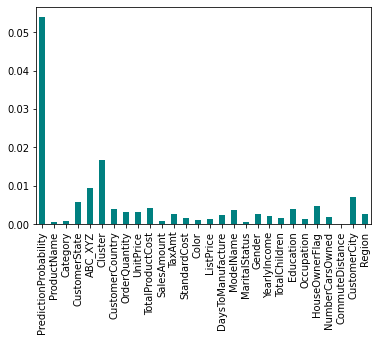

In [73]:
importances = mutual_info_classif(x_train, y_train)

feature_importances = pd.Series(importances, x.columns[0:len(x.columns)])
feature_importances.plot(kind='bar', color='teal')
plt.show()